# 1. Load Dataset

In [2]:
import pandas as pd

df = pd.read_csv("US_Accidents_March23.csv")  # or the version you downloaded
print(df.shape)
df.head()


(7728394, 46)


ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

# 2. Time of Day Analysis

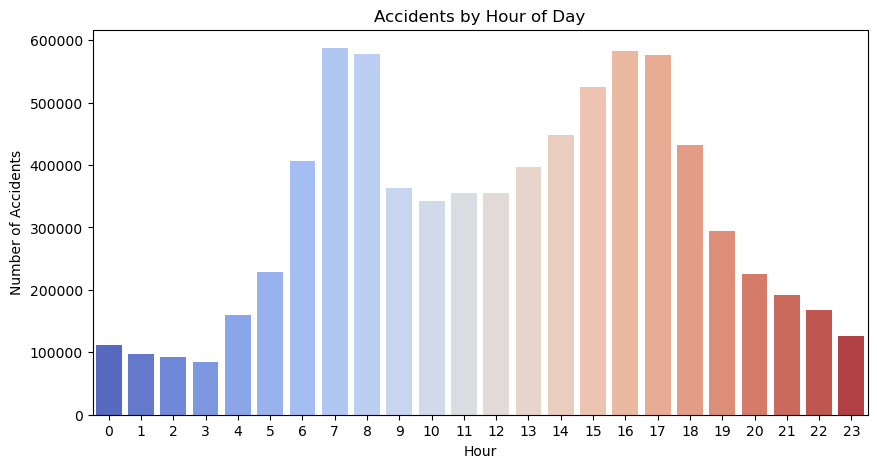

In [3]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract hour from datetime
df['Hour'] = df['Start_Time'].dt.hour

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()


# 3. Weather Conditions

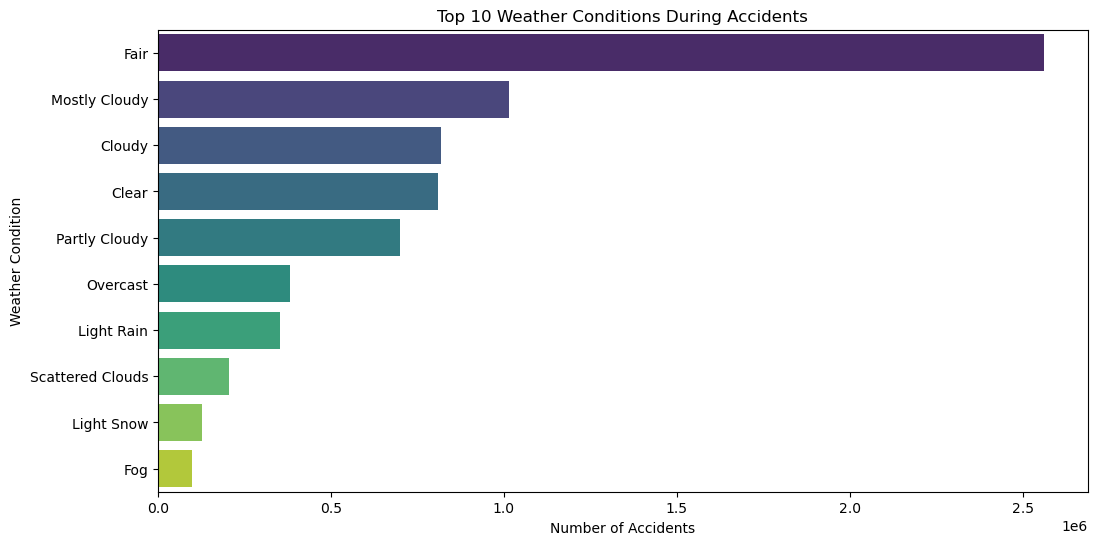

In [4]:
plt.figure(figsize=(12,6))
sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().head(10).index, palette='viridis')
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()


# 4. Road Condition: Visibility & Severity

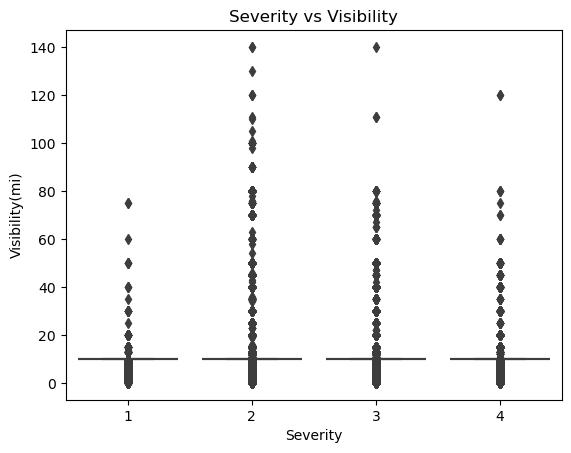

In [5]:
# Relationship between visibility and severity
sns.boxplot(x='Severity', y='Visibility(mi)', data=df)
plt.title('Severity vs Visibility')
plt.show()


# 5. Accident Hotspots (Map Visualization)

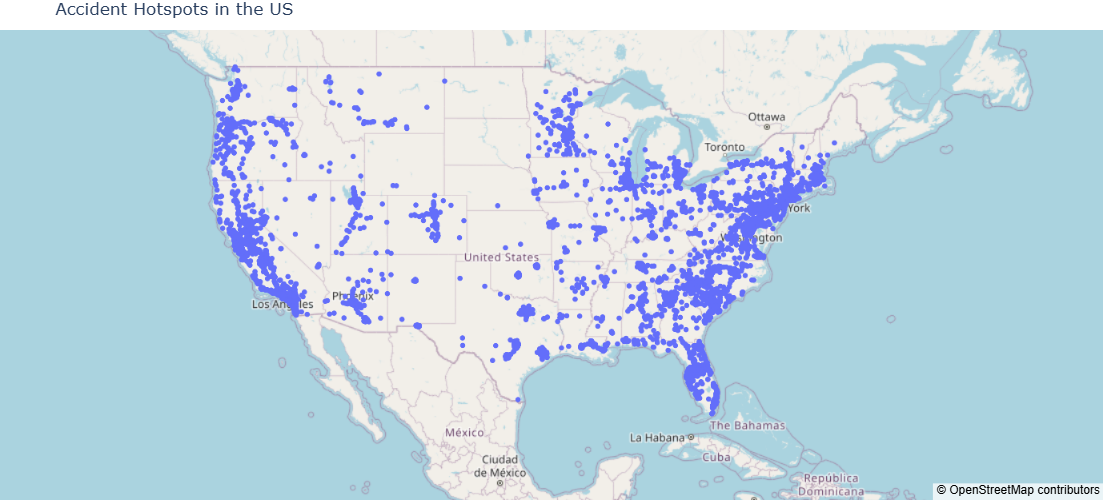

In [6]:
import plotly.express as px

# Sample for performance
df_sample = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

fig = px.scatter_mapbox(
    df_sample,
    lat="Start_Lat",
    lon="Start_Lng",
    zoom=3,
    height=500,
    title="Accident Hotspots in the US",
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()


# 6. Accidents by Day of the Week

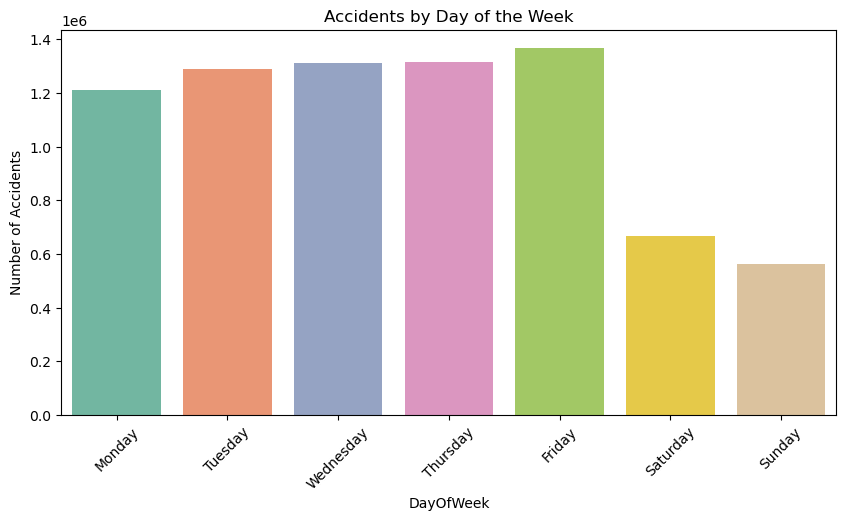

In [7]:
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

plt.figure(figsize=(10,5))
sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2')
plt.title("Accidents by Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()
